<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import libraries</a></span></li></ul></li><li><span><a href="#Read-and-explore-data" data-toc-modified-id="Read-and-explore-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read and explore data</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#Rename-columns" data-toc-modified-id="Rename-columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Rename columns</a></span></li><li><span><a href="#Handle-missing-values" data-toc-modified-id="Handle-missing-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Handle missing values</a></span></li><li><span><a href="#Replace-outliers" data-toc-modified-id="Replace-outliers-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Replace outliers</a></span></li><li><span><a href="#Split-the-dataset-into-train-and-test-data" data-toc-modified-id="Split-the-dataset-into-train-and-test-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Split the dataset into train and test data</a></span></li><li><span><a href="#Split-dataset-into-the-target-variable-and-dependent-variables" data-toc-modified-id="Split-dataset-into-the-target-variable-and-dependent-variables-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Split dataset into the target variable and dependent variables</a></span></li><li><span><a href="#Data-Transformation" data-toc-modified-id="Data-Transformation-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Data Transformation</a></span></li><li><span><a href="#Helper-Function:-Create-a-3D-Input-Dataset" data-toc-modified-id="Helper-Function:-Create-a-3D-Input-Dataset-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Helper Function: Create a 3D Input Dataset</a></span></li></ul></li><li><span><a href="#Create-BiLSTM,-LSTM-and-GRU-model" data-toc-modified-id="Create-BiLSTM,-LSTM-and-GRU-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create BiLSTM, LSTM and GRU model</a></span><ul class="toc-item"><li><span><a href="#Fit-the-models" data-toc-modified-id="Fit-the-models-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Fit the models</a></span><ul class="toc-item"><li><span><a href="#Plot-Train-loss-and-validation-loss" data-toc-modified-id="Plot-Train-loss-and-validation-loss-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Plot Train loss and validation loss</a></span></li></ul></li><li><span><a href="#Inverse-target-variable-for-train-and-test-data" data-toc-modified-id="Inverse-target-variable-for-train-and-test-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Inverse target variable for train and test data</a></span></li></ul></li><li><span><a href="#Make-prediction-using-BiLSTM,-LSTM-and-GRU" data-toc-modified-id="Make-prediction-using-BiLSTM,-LSTM-and-GRU-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Make prediction using BiLSTM, LSTM and GRU</a></span><ul class="toc-item"><li><span><a href="#Plot-true-future-vs-prediction" data-toc-modified-id="Plot-true-future-vs-prediction-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Plot true future vs prediction</a></span></li><li><span><a href="#Calculate-RMSE-and-MAE" data-toc-modified-id="Calculate-RMSE-and-MAE-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Calculate RMSE and MAE</a></span></li></ul></li><li><span><a href="#Forecast-water-consumption-in-10-years" data-toc-modified-id="Forecast-water-consumption-in-10-years-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Forecast water consumption in 10 years</a></span></li></ul></div>

# Introduction
In this notebook, I compare three commonly used Recurrent Neural Network; Long Short-Term Memory (LSTM), Gated Recurrent Unit (GRU) and Bidirectional LSTM (BiLSTM) based on their performance on predicting water consumption under the impact of climate change. Then, I use the best model to forecast urban water consumption for the next 10 years. 

## Dataset
The city of Brossard, Quebec, Canada, is chosen as a study site. The city is a part of the metropolitan area of Montreal on the south shore of the Saint Lawrence River.

For this project, **Daily water consumption** data are obtained from 2011-09-01 to 2015-09-30. For the same period, **minimum temperature**, **maximum temperature** and **total precipitation** are collected. Measurements of these climatic variables were made from [Environment Canada](https://www.concordia.ca/news/stories/2019/01/07/historical-canadian-climate-data-is-now-only-a-few-clicks-away.html).


## Import libraries

In [ ]:
import scipy
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# fix random seed for reproducibility
np.random.seed(1234)

# Read and explore data 
While I import data from a data file, I make sure the **Date** column has the correct *datetime* format by **parse_dates = ['Date']**.

When I work with date and time, it becomes much easier if I set **Date** column as the dataframe index.

In [ ]:
file = 'Data.csv'
raw_data = pd.read_csv(file, parse_dates = ['Date'], index_col = 'Date')

df = raw_data.copy()

In [ ]:
# Explore the first five rows
df.head()

,Max Temp (C),Min Temp (C),Total Precip (mm),WC (m3/capita.day)
Date,,,,
2011-09-01,25.8,14.1,0.0,0.471092
2011-09-02,26.9,19.7,0.0,0.455604
2011-09-03,29.5,21.1,0.0,0.436626
2011-09-04,27.8,19.2,15.0,0.442867
2011-09-05,21.5,14.6,11.0,0.437708


In [ ]:
# Data description
df.describe()

,Max Temp (C),Min Temp (C),Total Precip (mm),WC (m3/capita.day)
count,1464.000000,1471.000000,1437.000000,1490.000000
mean,12.385178,3.174439,2.461100,0.370478
std,12.579884,11.864836,5.757138,0.051454
min,-22.300000,-27.200000,0.000000,0.169521
25%,2.275000,-5.100000,0.000000,0.334604
50%,13.800000,4.800000,0.000000,0.360317
75%,23.600000,13.300000,1.600000,0.400392
max,33.600000,23.800000,45.500000,0.583743


In [ ]:
# Find number of rows and columns
df.shape

(1491, 4)

**Plot Time-Series**

Let's plot daily water consumption.

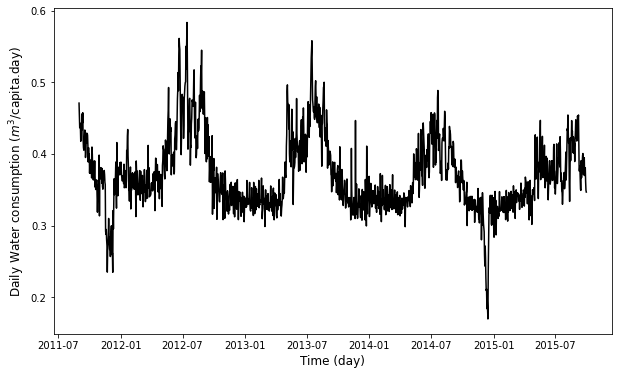

In [ ]:
# Define a function to draw time_series plot
def timeseries (x_axis, y_axis, x_label, y_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12})
    plt.ylabel(y_label, {'fontsize': 12})


timeseries(df.index, df['WC (m3/capita.day)'], 'Time (day)', 'Daily Water consumption ($m^3$/capita.day)')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


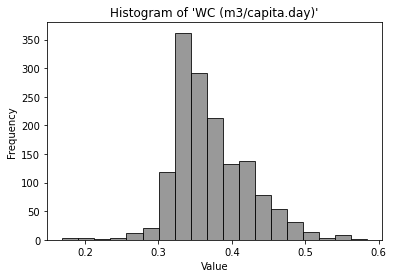

In [ ]:
def plot_histogram(x):
    plt.hist(x, bins = 19, alpha=0.8, color = 'gray', edgecolor = 'black')
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plot_histogram(df['WC (m3/capita.day)'])

# Data pre-processing

## Rename columns
I rename column names for the sake of simplicity. 

In [ ]:
df = df.rename(columns = {'Max Temp (C)':'Max_T', 'Min Temp (C)':'Min_T', 
                          'Total Precip (mm)':'T_P','WC (m3/capita.day)':'UWC'})
df

,Max_T,Min_T,T_P,UWC
Date,,,,
2011-09-01,25.8,14.1,0.0,0.471092
2011-09-02,26.9,19.7,0.0,0.455604
2011-09-03,29.5,21.1,0.0,0.436626
2011-09-04,27.8,19.2,15.0,0.442867
2011-09-05,21.5,14.6,11.0,0.437708
...,...,...,...,...
2015-09-26,18.0,5.6,0.0,0.377468
2015-09-27,23.1,5.2,0.0,0.380783
2015-09-28,21.4,13.0,0.6,0.361291


## Handle missing values
When it comes to time-series data, it is a good idea to use linear interpolation to replace missing values.

In [ ]:
# Check missing values
df.isnull().sum()

Max_T    27
Min_T    20
T_P      54
UWC       1
dtype: int64

In [ ]:
# Replace missing values by interpolation
def replace_missing (attribute):
    return attribute.interpolate(inplace=True)

replace_missing(df['Max_T'])
replace_missing(df['Min_T'])
replace_missing(df['T_P'])
replace_missing(df['UWC'])

## Replace outliers
I use statistical methods to detect outliers. The statistical methods assume a normal distribution of data points. Therefore, values in a low probability region are considered as outliers. 

I apply the concept of maximum likelihood in the statistical methods meaning that values outside the range of
μ±2σ are labelled as an outlier. Note that μ±2σ contains 95% of data
under the assumption of normal distribution.

In [ ]:
# Outlier detection
up_b = df['UWC'].mean() + 2*df['UWC'].std()
low_b = df['UWC'].mean() - 2*df['UWC'].std()

# Replace outlier by interpolation for base consumption
df.loc[df['UWC'] > up_b, 'UWC'] = np.nan
df.loc[df['UWC'] < low_b, 'UWC'] = np.nan
df['UWC'].interpolate(inplace=True)

## Split the dataset into train and test data
In this project, I set the first 80% of data as train data and the remaining 20% as test data. I train the model with train data and validate its performance with test data.

train_dataset.shape:  (1192, 4)
test_dataset.shape:  (299, 4)


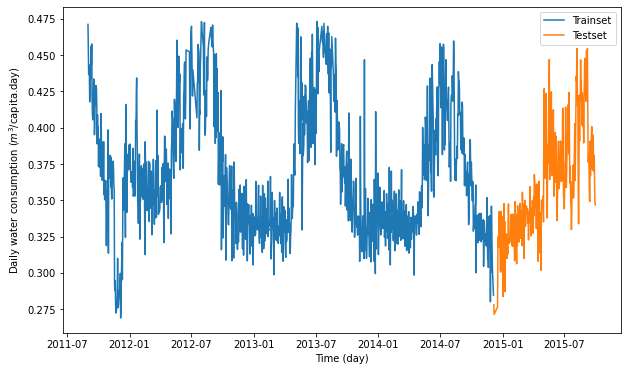

In [ ]:
train_size = int(len(df)*0.8)
train_dataset, test_dataset = df.iloc[:train_size], df.iloc[train_size:]

# Plot train and test data
plt.figure(figsize = (10, 6))
plt.plot(train_dataset.UWC)
plt.plot(test_dataset.UWC)
plt.xlabel('Time (day)')
plt.ylabel('Daily water consumption ($m^3$/capita.day)')
plt.legend(['Trainset', 'Testset'], loc='upper right')

print('train_dataset.shape: ',train_dataset.shape)
print('test_dataset.shape: ', test_dataset.shape)

## Split dataset into the target variable and dependent variables

In [ ]:
# Split train data to X and y
X_train = train_dataset.drop('UWC', axis = 1)
y_train = train_dataset.loc[:,['UWC']]

# Split test data to X and y
X_test = test_dataset.drop('UWC', axis = 1)
y_test = test_dataset.loc[:,['UWC']]

## Data Transformation 
A good rule of thumb is that normalized data lead to better performance in Neural Networks. In this project, I use **MinMaxScaler** from sklearn. 

I define different scaler for input and output as they have different shapes. This is especially important for using inverse transform function.

* X_train.shape:  (1192, 3)
* y_train.shape:  (1192, 1)
* X_test.shape:  (299, 3)
* y_test.shape:  (299, 1)

It is important to ensure that the scale of the output variable is in the range 0-1  to match the scale of the activation function (tanh) on the output layer of LSTM, GRU and BiLSTM. Also, input variables are better to be small values, probably in the range of 0-1.

What are the steps?
- Fit the scaler using available training data (It means that the minimum and maximum observable values are estimated using training data.) 

- Apply the scaler to training data 

- Apply the scaler to test data

It is important to note that we should scale the unseen data with the scaler fitted on the training data.

In [ ]:
# Transform X_train, y_train, X_test and y_test

# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

## Helper Function: Create a 3D Input Dataset
LSTM, GRU and BiLSTM take a 3D input (num_samples, num_timesteps, num_features). So, I define a helper function, *create_dataset*, to reshape input.

In this project, I define time_steps = 30. It means that the model makes predictions based on the last 30 days data.

In [ ]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
        
    return np.array(Xs), np.array(ys)


TIME_STEPS = 30

X_test, y_test = create_dataset(test_x_norm, test_y_norm, TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm, TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_train.shape)

X_train.shape:  (269, 30, 3)
y_train.shape:  (1162, 1)
X_test.shape:  (269, 30, 3)
y_test.shape:  (1162, 1)


# Create BiLSTM, LSTM and GRU model
The first function, *create_model*, gets two inputs; number of units (neurons) in each layer and model name (LSTM or GRU). The second function, create_model_bilstm, creates a BDLSM and only gets number of units in each layer. 

For the sake of simplicity, I define BiLSTM, LSTM and GRU as a 2-layer network including 64 nuerons in the hidden layers and 1 neuron in the output layer .

In [ ]:
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = units, return_sequences = True, input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) # Meaning 20% of the layers will be dropped.
    # Second layer of LSTM
    model.add(m (units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model


# Create Biodirectional model
def create_model_bilstm(units):
    model = Sequential()
    # First layer of Bidirectional LSTM
    model.add(Bidirectional(LSTM(units = units, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
    # Second layer of Bidirectional LSTM
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

In [ ]:
# BiLSTM
model_bilstm = create_model_bilstm(64)

# GRU or LSTM 
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

## Fit the models
To avoid overfitting, I set an early stop to stop training when "val_loss" has not improved after 10 epochs (patience = 10).


In [ ]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

    # shuffle = False because the order of the data matters
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,
                    batch_size = 32, shuffle = False, callbacks = [early_stop])
    return history

history_bilstm = fit_model(model_bilstm)
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)

Epoch 1/100
30/30 [==============================] - 2s 81ms/step - loss: 0.0424 - val_loss: 0.0333
Epoch 2/100
30/30 [==============================] - 1s 33ms/step - loss: 0.0403 - val_loss: 0.0252
Epoch 3/100
30/30 [==============================] - 1s 32ms/step - loss: 0.0396 - val_loss: 0.0248
Epoch 4/100
30/30 [==============================] - 1s 32ms/step - loss: 0.0387 - val_loss: 0.0232
Epoch 5/100
30/30 [==============================] - 1s 33ms/step - loss: 0.0378 - val_loss: 0.0227
Epoch 6/100
30/30 [==============================] - 1s 32ms/step - loss: 0.0372 - val_loss: 0.0227
Epoch 7/100
30/30 [==============================] - 1s 32ms/step - loss: 0.0359 - val_loss: 0.0246
Epoch 8/100
30/30 [==============================] - 1s 32ms/step - loss: 0.0341 - val_loss: 0.0264
Epoch 9/100
30/30 [==============================] - 1s 32ms/step - loss: 0.0324 - val_loss: 0.0269
Epoch 10/100
30/30 [==============================] - 1s 32ms/step - loss: 0.0314 - val_loss: 0.0268

### Plot Train loss and validation loss 

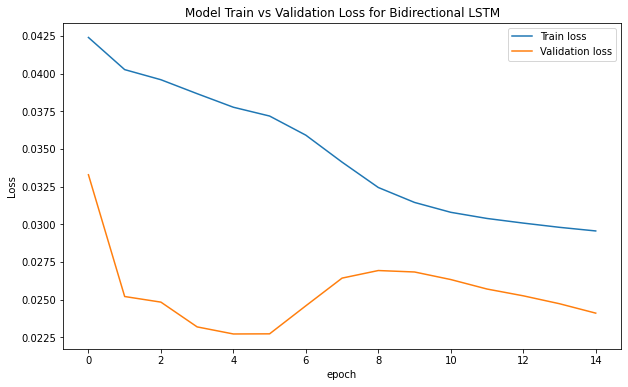

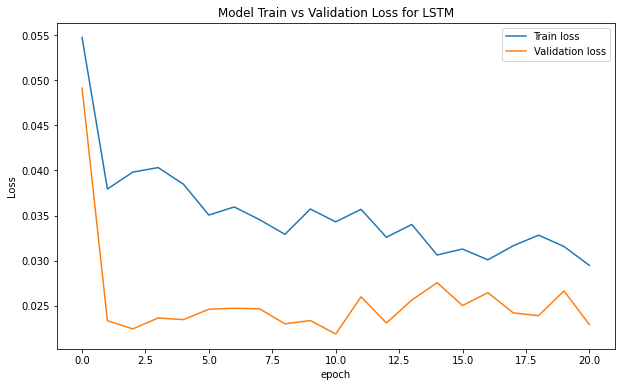

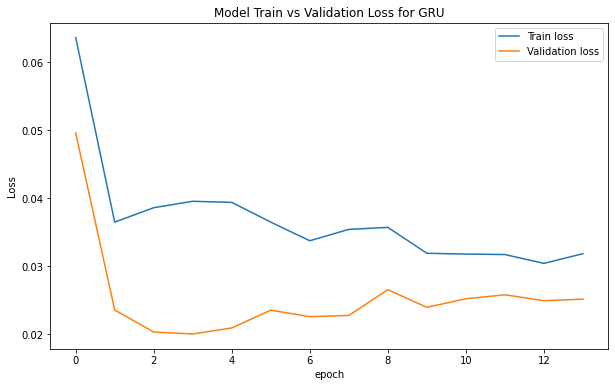

In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    plt.show()

plot_loss (history_bilstm, 'Bidirectional LSTM')
plot_loss (history_lstm, 'LSTM')
plot_loss (history_gru, 'GRU')

## Inverse target variable for train and test data

In [ ]:
# Note that I have to use scaler_y
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

# Make prediction using BiLSTM, LSTM and GRU

In [ ]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)


## Plot true future vs prediction

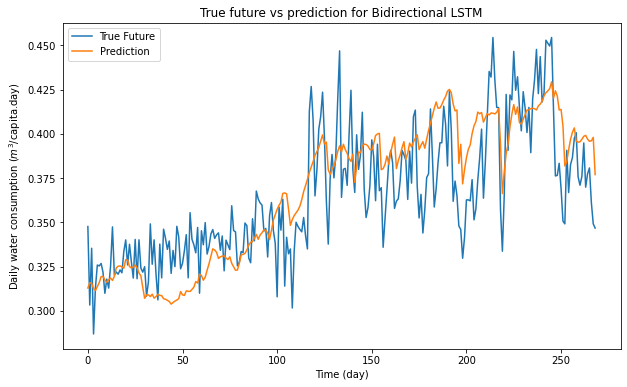

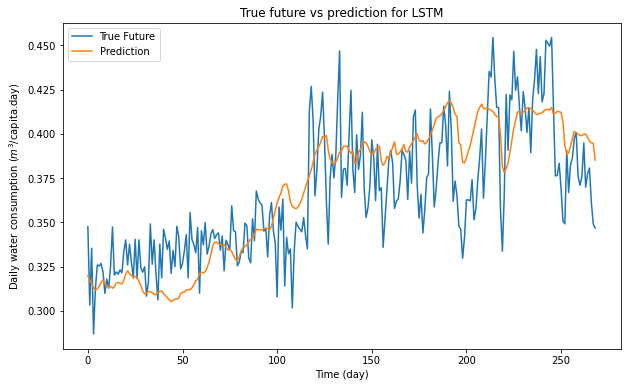

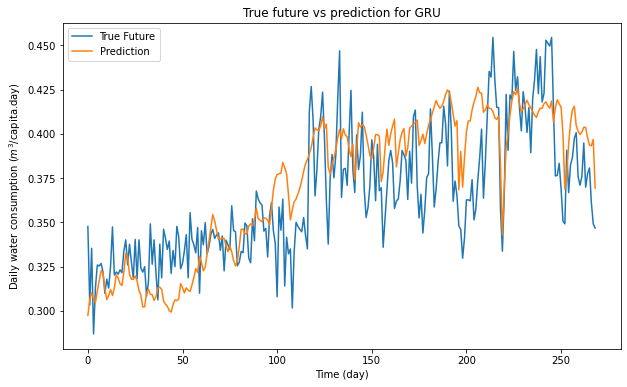

In [ ]:
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='True Future')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('True future vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Daily water consumption ($m^3$/capita.day)')
    
    
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)
plot_future(prediction_lstm, 'LSTM', y_test)
plot_future(prediction_gru, 'GRU', y_test)

## Calculate RMSE and MAE

In [ ]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')


evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_gru, y_test, 'GRU')


Bidirectional LSTM:
Mean Absolute Error: 0.0196
Root Mean Square Error: 0.0242

LSTM:
Mean Absolute Error: 0.0202
Root Mean Square Error: 0.0250

GRU:
Mean Absolute Error: 0.0213
Root Mean Square Error: 0.0262



Results show that **BiLSTM** has the best performance compared to LSTM and GRU. So I use BiLSTM model to forecast water consumption in the next 10 years. 

# Forecast water consumption in 10 years
I import climate data projections and filter them for the period of 2015-01-01 to 2025-01-01.

In [ ]:
# Import climate data projection
newinput = pd.read_csv('Climate Projection.csv', parse_dates=['Date'], index_col = 'Date')

# Order of the variable are important
X_new = newinput.loc['2015-01-01':'2025-01-01',:] 
X_new

,Max_T,Min_T,T_P
Date,,,
2015-01-01,0.277555,-8.716697,13.182100
2015-01-02,-3.914390,-14.399488,0.097887
2015-01-03,-6.322045,-14.075309,15.170749
2015-01-04,-6.649641,-14.971584,0.721021
2015-01-05,-7.567964,-14.486991,0.314032
...,...,...,...
2024-12-28,-4.463168,-8.274184,1.820822
2024-12-29,-5.153296,-10.554352,0.738211
2024-12-30,-4.472976,-10.539899,6.611651


In [ ]:
# Plot histoy and future data
def plot_history_future(y_train, prediction, model_name):
    
    plt.figure(figsize=(10, 6))
    
    range_history = len(y_train)
    range_future = list(range(range_history, range_history + len(prediction)))

    plt.plot(np.arange(range_history), np.array(y_train), label='History')
    plt.plot(range_future, np.array(prediction),label='Prediction')

    plt.title('History and prediction for ' + model_name)
    plt.legend(loc='upper right')
    plt.xlabel('Time (day)')
    plt.ylabel('Daily water consumption ($m^3$/capita.day)')


In [ ]:
def forecast(X_input, time_steps):
    # Scale the unseen input with the scaler fitted on the training data
    X = input_scaler.transform(X_input)
    # Reshape unseen data to a 3D input
    Xs = []
    for i in range(len(X) - time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        
    X_transformed = np.array(Xs)

    # Make prediction for unseen data using BiLSTM model 
    prediction = model_bilstm.predict(X_transformed)
    prediction_actual = scaler_y.inverse_transform(prediction)
    return prediction_actual

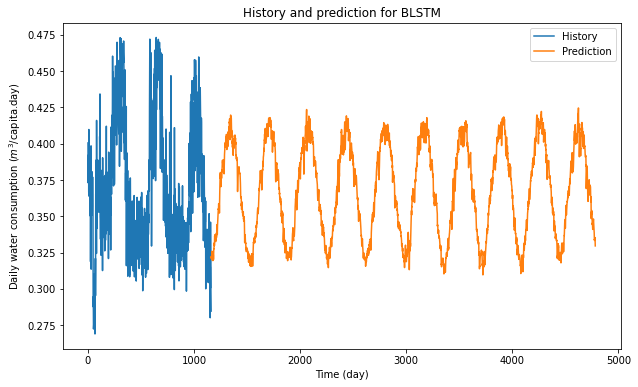

In [ ]:
prediction = forecast(X_new, TIME_STEPS)
plot_history_future(y_train, prediction,'BiLSTM')